In [2]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash',
                   'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']

In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wine = df_wine[df_wine['Class label'] != 1]

In [5]:
y = df_wine['Class label'].values
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [23]:
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values
X

array([[12.37,  1.82],
       [12.33,  1.67],
       [12.64,  1.59],
       [13.67,  2.46],
       [12.37,  2.87],
       [12.17,  2.23],
       [12.37,  2.3 ],
       [13.11,  3.18],
       [12.37,  3.48],
       [13.34,  1.93],
       [12.21,  3.07],
       [12.29,  1.82],
       [13.86,  3.16],
       [13.49,  2.78],
       [12.99,  3.5 ],
       [11.96,  3.13],
       [11.66,  2.14],
       [13.03,  2.48],
       [11.84,  2.52],
       [12.33,  2.31],
       [12.7 ,  3.13],
       [12.  ,  3.12],
       [12.72,  3.14],
       [12.08,  2.72],
       [13.05,  2.01],
       [11.84,  3.08],
       [12.67,  3.16],
       [12.16,  2.26],
       [11.65,  3.21],
       [11.64,  2.75],
       [12.08,  3.21],
       [12.08,  2.27],
       [12.  ,  2.65],
       [12.69,  2.06],
       [12.29,  3.3 ],
       [11.62,  2.96],
       [12.47,  2.63],
       [11.81,  2.26],
       [12.29,  2.74],
       [12.37,  2.77],
       [12.29,  2.83],
       [12.08,  2.96],
       [12.6 ,  2.77],
       [12.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1,
                                                   stratify=y)
y_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0])

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

In [15]:
# calculate accuracy for decision tree
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.833


In [16]:
# calculate accuracy for bagging
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.917


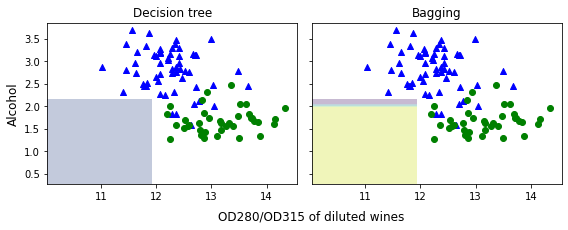

In [53]:
import numpy as np
x_min = X_train[:,0].min()-1
x_max = X_train[:,0].min()+1
y_min = X_train[:,1].min()-1
y_max = X_train[:,1].min()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    (np.arange(y_min, y_max, 0.1)))
import matplotlib.pyplot as plt
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',figsize=(8, 3))

for idx, clf,tt in zip([0,1],
                       [tree,bag],
                       ['Decision tree','Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha = 0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                      X_train[y_train == 0, 1],
                      c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                      X_train[y_train == 1, 1],
                      c='green',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol',fontsize=12)
plt.tight_layout()
plt.text(0,-0.2,
        s='OD280/OD315 of diluted wines',
        ha='center',
        va='center',
        fontsize=12,
        transform = axarr[1].transAxes)
plt.show()

In [51]:
idx

1

array([[10.03,  0.27],
       [10.13,  0.27],
       [10.23,  0.27],
       [10.33,  0.27],
       [10.43,  0.27],
       [10.53,  0.27],
       [10.63,  0.27],
       [10.73,  0.27],
       [10.83,  0.27],
       [10.93,  0.27],
       [11.03,  0.27],
       [11.13,  0.27],
       [11.23,  0.27],
       [11.33,  0.27],
       [11.43,  0.27],
       [11.53,  0.27],
       [11.63,  0.27],
       [11.73,  0.27],
       [11.83,  0.27],
       [11.93,  0.27],
       [10.03,  0.37],
       [10.13,  0.37],
       [10.23,  0.37],
       [10.33,  0.37],
       [10.43,  0.37],
       [10.53,  0.37],
       [10.63,  0.37],
       [10.73,  0.37],
       [10.83,  0.37],
       [10.93,  0.37],
       [11.03,  0.37],
       [11.13,  0.37],
       [11.23,  0.37],
       [11.33,  0.37],
       [11.43,  0.37],
       [11.53,  0.37],
       [11.63,  0.37],
       [11.73,  0.37],
       [11.83,  0.37],
       [11.93,  0.37],
       [10.03,  0.47],
       [10.13,  0.47],
       [10.23,  0.47],
       [10.

In [49]:
xx.ravel()

array([10.03, 10.13, 10.23, 10.33, 10.43, 10.53, 10.63, 10.73, 10.83,
       10.93, 11.03, 11.13, 11.23, 11.33, 11.43, 11.53, 11.63, 11.73,
       11.83, 11.93, 10.03, 10.13, 10.23, 10.33, 10.43, 10.53, 10.63,
       10.73, 10.83, 10.93, 11.03, 11.13, 11.23, 11.33, 11.43, 11.53,
       11.63, 11.73, 11.83, 11.93, 10.03, 10.13, 10.23, 10.33, 10.43,
       10.53, 10.63, 10.73, 10.83, 10.93, 11.03, 11.13, 11.23, 11.33,
       11.43, 11.53, 11.63, 11.73, 11.83, 11.93, 10.03, 10.13, 10.23,
       10.33, 10.43, 10.53, 10.63, 10.73, 10.83, 10.93, 11.03, 11.13,
       11.23, 11.33, 11.43, 11.53, 11.63, 11.73, 11.83, 11.93, 10.03,
       10.13, 10.23, 10.33, 10.43, 10.53, 10.63, 10.73, 10.83, 10.93,
       11.03, 11.13, 11.23, 11.33, 11.43, 11.53, 11.63, 11.73, 11.83,
       11.93, 10.03, 10.13, 10.23, 10.33, 10.43, 10.53, 10.63, 10.73,
       10.83, 10.93, 11.03, 11.13, 11.23, 11.33, 11.43, 11.53, 11.63,
       11.73, 11.83, 11.93, 10.03, 10.13, 10.23, 10.33, 10.43, 10.53,
       10.63, 10.73,